In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [6]:
df=pd.read_csv("retail_sales_dataset.csv")

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [12]:
df.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [14]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Weekday'] = df['Date'].dt.dayofweek
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

C:\Users\S Sangeetha\AppData\Local\Temp\ipykernel_318544\3308945123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Amount'])


<Axes: xlabel='Total Amount', ylabel='Density'>

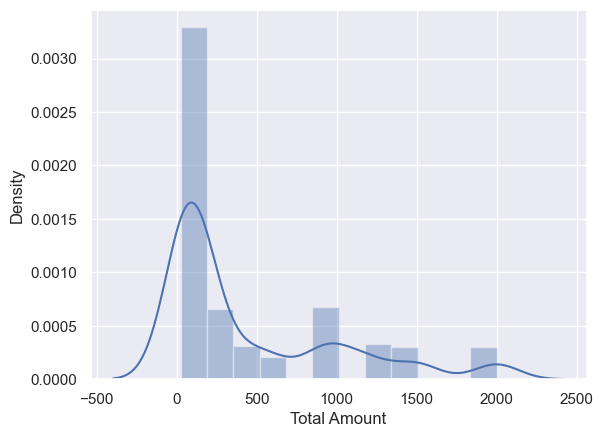

In [26]:
sns.distplot(df['Total Amount'])

In [28]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Weekday,year,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,4,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,4,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,6,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023,5


Text(0.5, 1.0, 'Monthly sales trend')

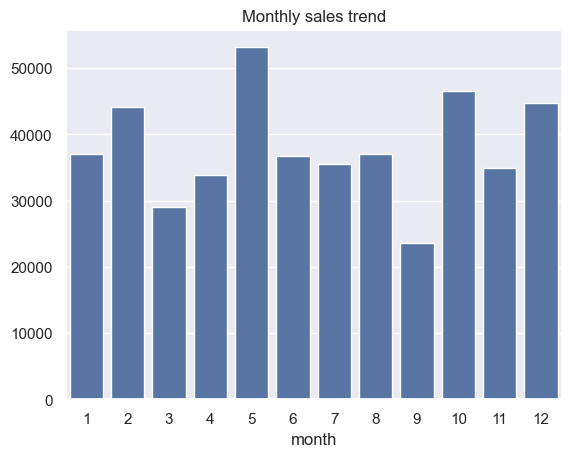

In [46]:
month_sales=df.groupby('month')['Total Amount'].sum()
sns.barplot(x=month_sales.index,y=month_sales.values)
plt.title("Monthly sales trend")

<Axes: xlabel='Product Category', ylabel='Total Amount'>

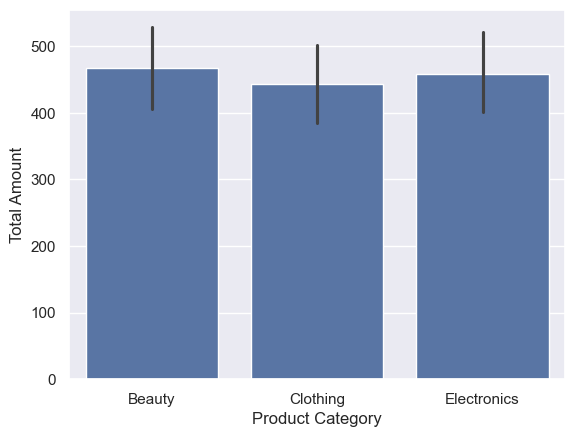

In [36]:
sns.barplot(x='Product Category',y='Total Amount',data=df)

Text(0.5, 1.0, 'Sales by age group')

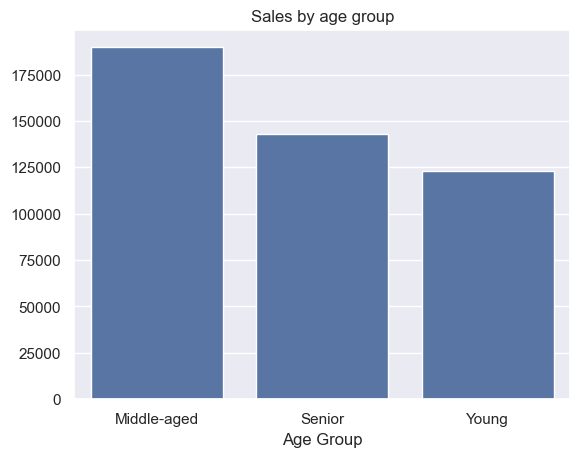

In [54]:
def categorize(age):
    if age<30:
        return 'Young'
    elif 30<= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'
df['Age Group'] = df['Age'].apply(categorize)
grouped_sales = df.groupby('Age Group')['Total Amount'].sum()
sns.barplot(x=grouped_sales.index,y=grouped_sales.values)
plt.title("Sales by age group")

In [56]:
df=pd.get_dummies(df,columns=['Product Category'],drop_first=True)

In [62]:
df=df.drop(['Transaction ID','Date','Customer ID','Age Group'],axis=1)

In [64]:
df['Gender'] = df['Gender'].map({"Male":0,"Female":1})

In [72]:
df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Weekday,year,month,Product Category_Clothing,Product Category_Electronics
0,0,34,3,50,150,4,2023,11,False,False
1,1,26,2,500,1000,0,2023,2,True,False
2,0,50,1,30,30,4,2023,1,False,True
3,0,37,1,500,500,6,2023,5,True,False
4,0,30,2,50,100,5,2023,5,False,False


In [76]:
X=df[['Gender','Age','Quantity','Price per Unit','Total Amount','Weekday','year','month','Product Category_Clothing','Product Category_Electronics']]
y=df['Total Amount']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Age','Quantity','Price per Unit']]=scaler.fit_transform(X_train[['Age','Quantity','Price per Unit']])
X_test[['Age','Quantity','Price per Unit']] = scaler.transform(X_test[['Age','Quantity','Price per Unit']])

In [86]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred=model.predict(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [96]:
print('Model Performance Metrics:')
print('Mean absolute error: ',mae)
print('Mean squared error: ',mse)
print('Root mean squared error: ',rmse)
print('r2_score: ',r2)

Model Performance Metrics:
Mean absolute error:  3.444355911597086e-14
Mean squared error:  2.2241459906163296e-27
Root mean squared error:  4.716085231011341e-14
r2_score:  1.0


Text(0.5, 1.0, 'Actaul vs predicted sales')

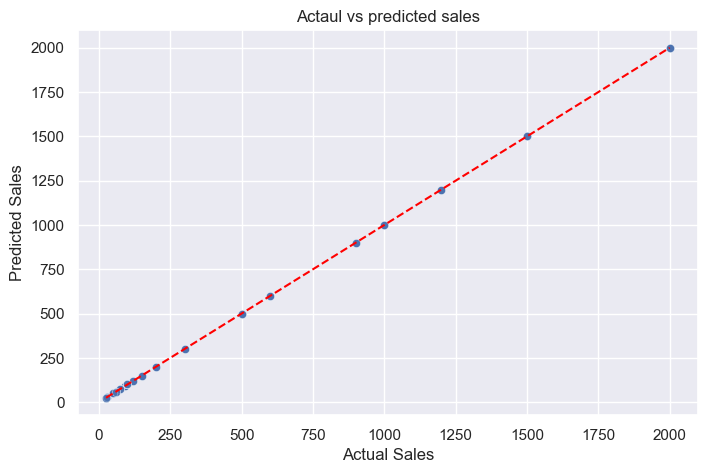

In [100]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--',color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actaul vs predicted sales")